## Importing Of Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS

## Reading Of Data And EDA

In [ ]:
data_proforma_one = pd.read_excel('/content/drive/MyDrive/DATASET/LTH/proforma-records - LTH(OGBOMOSO) - 2018-11-22 08_49_39.xlsx')
data_proforma_two = pd.read_excel("/content/drive/MyDrive/DATASET/LTH/Edited proforma-records - LTH(OGBOMOSO) - 2019-01-12 08_02_20.xlsx")

In [ ]:
data = pd.concat([data_proforma_one, data_proforma_two], ignore_index=True)

### Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 33 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   S/N                                                               511 non-null    int64  
 1   Created At                                                        511 non-null    object 
 2   Hospital                                                          511 non-null    object 
 3   Patient Id                                                        511 non-null    int64  
 4   Age of Patient (year)                                             509 non-null    float64
 5   Gender                                                            511 non-null    object 
 6   Blood Pressure (mm/Hg)                                            511 non-null    object 
 7   Weight (kg)                        

In [ ]:
data.columns

Index(['S/N', 'Created At', 'Hospital', 'Patient Id', 'Age of Patient (year)',
       'Gender', 'Blood Pressure (mm/Hg)', 'Weight (kg)',
       'Body temperature (0^c)', 'Hemoglobin (mmol/L)', 'Glucose (mmol/L)',
       'Urea (mmol/L)', 'Creatinine (Umol/L)', 'Sodium (mmol/L)',
       'Calcium (mmol/L)', 'Potassium (mmol/L)', 'Protein Serum (g/dL)',
       'Albumin Serum (g/dL)', 'Phosphorus Serum (mmol/L)',
       'Serum Ferritin (ng/L)', 'Glomerular Filtration Rate (ml/min/1.73 m2)',
       'Intermediate laboratory report(s)',
       'Actual Diagnosed stage of the Acute and Chronic Kidney Disease',
       'Extra Information',
       'Treatment for this stage of the Acute and Chronic Kidney Disease',
       'Comorbidities', 'Date of first appointment',
       'Stage of ACKD at first appointment',
       'Level of education at first appointment',
       'Age of patient at first appointment',
       'Location of Patient at first appointment', 'Lifestyle of patient',
       'Circumstance

In [ ]:
data.shape

(511, 33)

### 🧹 Handling Missing and Numerical Data

#### 🔴 Dropping Highly Incomplete Columns

A number of columns in the dataset were found to have approximately 80% or more missing values. These included clinical and biochemical measurements such as calcium levels, serum ferritin, albumin, protein, and hemoglobin, among others. Given the extent of the missingness, these variables were considered irredeemable and therefore excluded from the dataset to maintain the integrity and quality of subsequent analyses.

Additionally, identifier fields such as patient serial numbers and IDs were also removed, as they do not contribute meaningful information to the modeling process or data interpretation.

---

#### 🧪 Fine-tuning Mineral-Related Measurements

A separate group of columns containing biochemical markers such as creatinine, sodium, potassium, glucose, and urea were retained for further processing. These columns are important for clinical assessment and could contribute significantly to downstream analyses.

However, some of these values were stored as strings due to the use of commas instead of periods as decimal separators. These inconsistencies were addressed by cleaning and converting the data into standard numerical formats. This preprocessing step ensures the reliability of these measurements for statistical modeling and interpretation.

In [ ]:
columns_with_lnull = ['Calcium (mmol/L)','Extra Information','Serum Ferritin (ng/L)','Phosphorus Serum (mmol/L)',
                      'Albumin Serum (g/dL)','Protein Serum (g/dL)','Hemoglobin (mmol/L)']

minerals_columns = ['Creatinine (Umol/L)', 'Sodium (mmol/L)', 'Potassium (mmol/L)',
                    'Glucose (mmol/L)', 'Urea (mmol/L)']

In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
Extra Information,511
Serum Ferritin (ng/L),511
Hemoglobin (mmol/L),503
Albumin Serum (g/dL),487
Protein Serum (g/dL),487
Phosphorus Serum (mmol/L),477
Calcium (mmol/L),470
Glucose (mmol/L),290
Body temperature (0^c),284
Sodium (mmol/L),226


In [ ]:
data =  data.drop(columns_with_lnull, axis=1)
data.drop(['S/N','Patient Id'],axis=1, inplace=True)

for cols in minerals_columns:
  if data[cols].dtype == 'object':
    data[cols] = (
        data[cols]
        .astype(str)
        .replace(',', '.', regex=True)
        .astype(float)
    )
  else:
    print(f"Skipped {cols}")

Skipped Sodium (mmol/L)
Skipped Glucose (mmol/L)


In [ ]:
data.dtypes

,0
Created At,object
Hospital,object
Age of Patient (year),float64
Gender,object
Blood Pressure (mm/Hg),object
Weight (kg),float64
Body temperature (0^c),float64
Glucose (mmol/L),float64
Urea (mmol/L),float64
Creatinine (Umol/L),float64




### 🧭 Checking for Duplicate Records

To ensure data quality and consistency, the dataset was examined for duplicate rows. Duplicate entries can arise from repeated data entry, merging issues, or logging errors, and if left unaddressed, they may skew the results of any analysis or predictive modeling.

During this step, the dataset was scanned for rows that appeared more than once. Any such records were identified and counted to assess their impact on the overall dataset. Identifying and resolving duplicates is a key part of data cleaning, as it helps eliminate redundancy and ensures that each observation contributes uniquely to the analysis.


In [ ]:
# Check for duplicate rows in the data
duplicates = data[data.duplicated()]
# Display duplicate rows, if any
print(f"Number of duplicate rows: {len(duplicates)}")
duplicates.head()

Number of duplicate rows: 248


,Created At,Hospital,Age of Patient (year),Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),...,Actual Diagnosed stage of the Acute and Chronic Kidney Disease,Treatment for this stage of the Acute and Chronic Kidney Disease,Comorbidities,Date of first appointment,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Lifestyle of patient,Circumstances surrounding first appointment
43,"Fri, Nov 16, 2018 9:18 AM",LTH(OGBOMOSO),42.0,Female,140/80,52.0,NaN,NaN,2.49,114.9,...,Stage 5 GFR <15mL/min/1.73m2,Tab cardesartan 8mg\nTab HCT 12.5mg dly,Hypertension,2016-01-04,Stage 5 GFR <15mL/min/1.73m2,Poultry farmer,42.0,Kaduna,"A 42 years old farmer, married in a monogamous...",Weight loss of about 2 years.
264,"Wed, Nov 21, 2018 11:49 AM",LTH(OGBOMOSO),74.0,Male,119/69,NaN,36.0,33.3,14.00,131.0,...,"GCF == 0, Undefined",IVF and SC soluble insulin 10IU 2 hourly\nIV C...,DM Nephropathy,2013-05-02,"GCF == 0, Undefined",Retired civil servant,74.0,Ogbomoso,"A 74 years old retiree, married in monogamous ...",Wound on the left foot\nHiccups
265,"Wed, Nov 21, 2018 11:48 AM",LTH(OGBOMOSO),60.0,Male,130/80/,NaN,NaN,NaN,6.80,140.0,...,"GCF == 0, Undefined",Tab Dexamethasane 20mg bd dly 1-4 and dys 15-1...,NaN,2016-04-26,"GCF == 0, Undefined",Pastoring,60.0,"LAUTECH TEACHING HOSPITAL, OGBOMOSO.","A 60 years old man, Pastor, Yoruba and Christi...",History of back pain and waist pain associated...
266,"Wed, Nov 21, 2018 11:23 AM",LTH(OGBOMOSO),73.0,Male,158/80,51.0,38.2,8.6,38.30,677.0,...,Stage 5 GFR <15mL/min/1.73m2,IV Ciprofloxacin 200mg 12hrly\nIV PCM 300mg 8h...,Hypertension,2012-10-24,Stage 5 GFR <15mL/min/1.73m2,NaN,73.0,LTH OGBOMOSO,"A 73 year old man,married in a polygamous sett...",Difficulty in passing urine
267,"Wed, Nov 21, 2018 11:19 AM",LTH(OGBOMOSO),22.0,Female,112/74/,NaN,37.4,NaN,2.50,93.0,...,"GCF == 0, Undefined",WF 5% D/S = 0.9% N/S 1L 12hly \nArtemether 160...,NaN,2017-07-17,"GCF == 0, Undefined",Student,22.0,"LAUTECH TEACHING HOSPITAL, OGBOMOSO.","A 22 years old student, Female, Yoruba and Chr...",Headache x 2/52\nMalaria x 2/52\nFever x 2/52


### 🩺 Cleaning Blood Pressure Records

To standardize and extract meaningful information from the *blood pressure* data in the dataset, a dedicated cleaning process was applied. Blood pressure readings were originally stored as single strings, often formatted inconsistently (e.g., `'120/80/'`, `'/'`, or blank). This necessitated a more structured transformation.

The key steps in the cleaning process included:

1. **Standardization of Format**:  
   Blood pressure entries were converted to string type to ensure uniform processing. Trailing slashes were removed to avoid misinterpretation of values, and clearly invalid entries (like a lone slash or empty string) were replaced with null values.

2. **Separation of Components**:  
   Blood pressure readings were split into two distinct components:  
   - **Systolic Blood Pressure (SBP)**: The first value in the string (e.g., `120`)  
   - **Diastolic Blood Pressure (DBP)**: The second value (e.g., `80`)  

3. **Type Conversion and Validation**:  
   Both SBP and DBP values were converted from string to numeric types. Any invalid or non-numeric entries were automatically set to null (`NaN`), preserving data integrity.

4. **Preservation of Original Data**:  
   The original blood pressure column was retained in the dataset for reference, while the new `SBP` and `DBP` columns were added to enable more granular analysis.

This transformation makes the blood pressure data both cleaner and more analytically useful, allowing for better clinical insights and statistical modeling.


In [ ]:
def clean_blood_pressure(df, column_name):
    """
    Cleans a blood pressure column in a DataFrame.

    - Removes trailing slashes
    - Handles missing or invalid values
    - Splits into Systolic (SBP) and Diastolic (DBP) columns
    - Converts to numeric format
    - Keeps the original column

    Args:
    - df (pd.DataFrame): The DataFrame containing the blood pressure column.
    - column_name (str): The column name of blood pressure readings.

    Returns:
    - pd.DataFrame: Updated DataFrame with 'SBP' and 'DBP' columns, keeping the original column.
    """
    # Ensure the column is a string type before processing
    df[column_name] = df[column_name].astype(str)

    # Remove trailing slashes
    df[column_name] = df[column_name].str.rstrip('/')

    # Replace standalone '/' or empty spaces with NaN
    df[column_name] = df[column_name].replace({'/': np.nan, '': np.nan})

    # Split into Systolic (SBP) and Diastolic (DBP) columns
    bp_df = df[column_name].str.split('/', expand=True)
    bp_df.columns = ['SBP', 'DBP']

    # Convert to numeric (invalid values become NaN)
    df['SBP'] = pd.to_numeric(bp_df['SBP'], errors='coerce')
    df['DBP'] = pd.to_numeric(bp_df['DBP'], errors='coerce')

    return df  # No dropping of the original column

clean_blood_pressure(data, 'Blood Pressure (mm/Hg)')

,Created At,Hospital,Age of Patient (year),Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),...,Comorbidities,Date of first appointment,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Lifestyle of patient,Circumstances surrounding first appointment,SBP,DBP
0,"Wed, Nov 21, 2018 11:49 AM",LTH(OGBOMOSO),74.000000,Male,119/69,NaN,36.0,33.3,14.0,131.0,...,DM Nephropathy,2013-05-02,"GCF == 0, Undefined",Retired civil servant,74.0,Ogbomoso,"A 74 years old retiree, married in monogamous ...",Wound on the left foot\nHiccups,119.0,69.0
1,"Wed, Nov 21, 2018 11:48 AM",LTH(OGBOMOSO),60.000000,Male,130/80,NaN,NaN,NaN,6.8,140.0,...,NaN,2016-04-26,"GCF == 0, Undefined",Pastoring,60.0,"LAUTECH TEACHING HOSPITAL, OGBOMOSO.","A 60 years old man, Pastor, Yoruba and Christi...",History of back pain and waist pain associated...,130.0,80.0
2,"Wed, Nov 21, 2018 11:23 AM",LTH(OGBOMOSO),73.000000,Male,158/80,51.00,38.2,8.6,38.3,677.0,...,Hypertension,2012-10-24,Stage 5 GFR <15mL/min/1.73m2,NaN,73.0,LTH OGBOMOSO,"A 73 year old man,married in a polygamous sett...",Difficulty in passing urine,158.0,80.0
3,"Wed, Nov 21, 2018 11:19 AM",LTH(OGBOMOSO),22.000000,Female,112/74,NaN,37.4,NaN,2.5,93.0,...,NaN,2017-07-17,"GCF == 0, Undefined",Student,22.0,"LAUTECH TEACHING HOSPITAL, OGBOMOSO.","A 22 years old student, Female, Yoruba and Chr...",Headache x 2/52\nMalaria x 2/52\nFever x 2/52,112.0,74.0
4,"Tue, Nov 20, 2018 12:34 PM",LTH(OGBOMOSO),69.000000,Male,126/70,94.00,NaN,NaN,2.6,116.0,...,Hypertension,2011-12-14,Stage 5 GFR <15mL/min/1.73m2,Retiree,69.0,Ogbomoso,"A 69 years old man, Yoruba, Christianity and R...","Elevated BP, \nLegs swelling about 2/52",126.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,"Wed, Oct 24, 2018 4:31 PM",LTH(OGBOMOSO),62.000000,Female,160/78,93.00,36.7,10.8,19.0,333.0,...,Hypertension,2012-09-13,Stage 5 GFR <15mL/min/1.73m2,60 year old retiree,60.0,UITH,a 60 year old retiree who is yoruba and a chri...,wound on left big toe,160.0,78.0
507,"Wed, Oct 24, 2018 4:05 PM",LTH(OGBOMOSO),15.000000,Female,160/124,46.00,36.4,NaN,20.4,1097.0,...,No Disease Selected,2018-03-09,Stage 5 GFR <15mL/min/1.73m2,NaN,15.0,oyo,"Single, 5 siblings, Took Herbal Concortion, , ...",Referral from oyo state hospital management bo...,160.0,124.0
508,"Wed, Oct 24, 2018 3:49 PM",LTH(OGBOMOSO),0.013699,Male,NaN,2.56,35.6,2.4,8.4,75.0,...,No Disease Selected,2018-08-04,Stage 5 GFR <15mL/min/1.73m2,NaN,5.0,"traditional birth home[CAC], Ogbomoso",A 5 days old baby,"child is a product of unplanned conception, th...",NaN,NaN
509,"Wed, Oct 24, 2018 2:58 PM",LTH(OGBOMOSO),19.000000,Male,250/150,62.20,36.2,7.6,9.8,203.0,...,Hypertension,2017-04-27,Stage 5 GFR <15mL/min/1.73m2,ssce,19.0,Oyo Alaafin,"A secondary school student, Islam as a religio...",Systemic hypertensive r/o CKD,250.0,150.0


### 🩺 Encoding Kidney Disease Stage into a Binary Target

To facilitate analysis and model training, a transformation was applied to the *"Actual Diagnosed Stage of the Acute and Chronic Kidney Disease"* column. The goal was to convert the different stages of kidney disease into a binary target variable that represents two categories:

1. **Stage 5 Kidney Disease (Severe)**:  
   The stage where the Glomerular Filtration Rate (GFR) is less than 15 mL/min/1.73m², indicating severe kidney dysfunction. This category was assigned a value of `1` to denote the presence of severe kidney disease.

2. **GCF == 0 (Undefined)**:  
   This stage corresponds to undefined or zero GFR values, generally representing either a lack of data or a non-diagnosed condition. This was assigned a value of `0` to denote the absence of the severe disease stage.

After encoding these two distinct stages, a new binary column, *Target*, was added to the dataset. This allows for more straightforward analysis, particularly when building predictive models that focus on the identification of severe kidney disease.

In [ ]:
def encode_kidney_disease_binary(df, column_name):
    """
    Converts the 'Actual Diagnosed stage of the Acute and Chronic Kidney Disease' column into a binary target variable.

    - Assigns 1 to "Stage 5 GFR <15mL/min/1.73m2"
    - Assigns 0 to "GCF == 0, Undefined"

    Args:
    - df (pd.DataFrame): The DataFrame containing the kidney disease stage column.
    - column_name (str): The column name to encode.

    Returns:
    - pd.DataFrame: Updated DataFrame with a binary target variable.
    """
    # Define binary mapping
    binary_mapping = {
        "Stage 5 GFR <15mL/min/1.73m2": 1,
        "GCF == 0, Undefined": 0
    }

    # Apply encoding
    df['Target'] = df[column_name].map(binary_mapping)

    return df

data_ = encode_kidney_disease_binary(data, 'Actual Diagnosed stage of the Acute and Chronic Kidney Disease')
data_['Target'].value_counts()

,count
Target,
1,300
0,211


### 🔄 Sorting and Forward-Filling Missing Data

In order to handle missing values more thoughtfully within the medical dataset, a two-step approach was employed:

1. **Sorting by Age**:  
   The data was first sorted based on the age of the patients in ascending order. This arrangement ensures that records are ordered from the youngest to the oldest individuals. Since age is a critical variable in medical datasets — often correlating with various health indicators — this sorting provides a meaningful structure for subsequent imputation.

2. **Forward-Filling Missing Values**:  
   After sorting, forward fill imputation was applied. This technique fills in missing values by propagating the last known non-missing value forward within the ordered data. When combined with age-based sorting, this method is expected to impute missing data using values from patients in similar age ranges or health stages, reducing the likelihood of introducing unrealistic or skewed information.

This approach is particularly useful in healthcare contexts where patient characteristics and clinical measurements often change gradually with age. As such, it allows for more contextually relevant imputation compared to randomly filling or dropping missing data.



In [ ]:
# Sort the data by the 'age' column in ascending order
data_ = data_.sort_values(by='Age of Patient (year)', ascending=True)

# Forward fill missing values
data_ = data_.ffill()

data_.isnull().sum().sort_values(ascending=False)

,0
Blood Pressure (mm/Hg),2
DBP,2
SBP,2
Level of education at first appointment,2
Age of Patient (year),0
Weight (kg),0
Body temperature (0^c),0
Glucose (mmol/L),0
Gender,0
Hospital,0


### Question ?
Do we remove this rows ? Removing them would give us a perfect Data, Keeping them doesnt really do much.

In [ ]:
# select the missing values to show the rows
data_[data_.isnull().any(axis=1)]

,Created At,Hospital,Age of Patient (year),Gender,Blood Pressure (mm/Hg),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),...,Date of first appointment,Stage of ACKD at first appointment,Level of education at first appointment,Age of patient at first appointment,Location of Patient at first appointment,Lifestyle of patient,Circumstances surrounding first appointment,SBP,DBP,Target
508,"Wed, Oct 24, 2018 3:49 PM",LTH(OGBOMOSO),0.013699,Male,NaN,2.56,35.6,2.4,8.4,75.0,...,2018-08-04,Stage 5 GFR <15mL/min/1.73m2,NaN,5.0,"traditional birth home[CAC], Ogbomoso",A 5 days old baby,"child is a product of unplanned conception, th...",NaN,NaN,1
244,"Wed, Oct 24, 2018 3:49 PM",LTH(OGBOMOSO),0.013699,Male,NaN,2.56,35.6,2.4,8.4,75.0,...,2018-08-04,Stage 5 GFR <15mL/min/1.73m2,NaN,5.0,"traditional birth home[CAC], Ogbomoso",A 5 days old baby,"child is a product of unplanned conception, th...",NaN,NaN,1


In [ ]:
data_.dropna(inplace=True)

In [ ]:
data_.isnull().sum()

,0
Created At,0
Hospital,0
Age of Patient (year),0
Gender,0
Blood Pressure (mm/Hg),0
Weight (kg),0
Body temperature (0^c),0
Glucose (mmol/L),0
Urea (mmol/L),0
Creatinine (Umol/L),0


### 🧑‍⚕️ Summary of Data Descriptive Statistics

The dataset contains 511 entries, with several clinical features related to patients' health. Below is a summary of key statistics for each variable:

1. **Age of Patient (years)**:  
   - The ages range from approximately 0.01 to 85 years, with a mean of about 47.9 years and a standard deviation of 18.98 years. The middle 50% of patients are between 34 and 63 years old.

2. **Weight (kg)**:  
   - The patients’ weights range from 2.56 to 108.7 kg, with a mean weight of 65.34 kg. The middle 50% of patients weigh between 55 kg and 76 kg.

3. **Body Temperature (°C)**:  
   - Body temperatures range from -38°C (which may indicate a data issue) to 59.4°C, with an average of 36.71°C, which is within the normal human range. A standard deviation of 5.14°C suggests some variation across the dataset.

4. **Glucose (mmol/L)**:  
   - The glucose levels range from 2.4 mmol/L to 173 mmol/L, with a mean of 9.43 mmol/L. The middle 50% of patients have glucose levels between 4.9 and 9.8 mmol/L, indicating variation in glucose concentrations.

5. **Urea (mmol/L)**:  
   - Urea concentrations range from 1.6 mmol/L to 219 mmol/L, with a mean of 22.75 mmol/L. The middle 50% have urea levels between 8.2 mmol/L and 30.85 mmol/L.

6. **Creatinine (µmol/L)**:  
   - The creatinine levels range from 1.58 µmol/L to 3300 µmol/L, with a mean value of 616.31 µmol/L. A wide range indicates variability in kidney function.

7. **Sodium (mmol/L)**:  
   - Sodium levels vary from 103.6 to 177 mmol/L, with an average of 132.74 mmol/L.

8. **Potassium (mmol/L)**:  
   - Potassium levels range from 1.1 to 8.0 mmol/L, with a mean of 4.34 mmol/L, reflecting the normal range for this electrolyte.

9. **Glomerular Filtration Rate (ml/min/1.73 m²)**:  
   - The GFR (a measure of kidney function) has values ranging from 0.0 to 6.03, with a mean of 0.26 ml/min/1.73 m². Many patients likely have low or undefined kidney function, as indicated by the wide spread.

10. **Age of Patient at First Appointment**:  
   - The age at the first appointment ranges from 5 to 85 years, with a mean of 47.56 years.

11. **Systolic Blood Pressure (SBP)**:  
   - The SBP ranges from 77 mmHg to 292 mmHg, with a mean of 148.30 mmHg. This suggests a mix of normal and high blood pressure across the dataset.

12. **Diastolic Blood Pressure (DBP)**:  
   - The DBP ranges from 10 mmHg to 160 mmHg, with a mean of 88.46 mmHg, indicating a mix of normal and high blood pressure readings.

13. **Target**:  
   - The *Target* variable, representing the binary classification of kidney disease stage, has a mean of 0.59, indicating that a little over half of the patients are categorized as Stage 5 or undefined kidney disease.

### Observations:
- Some variables (such as body temperature and GFR) show extreme outliers, which may require further data cleaning.
- A few variables (e.g., potassium, sodium) have relatively tight distributions, indicating more consistent values.
- The `Target` variable is fairly balanced, with approximately 59% of the patients falling into the binary condition for severe kidney disease.


In [ ]:
data_.describe()

,Age of Patient (year),Weight (kg),Body temperature (0^c),Glucose (mmol/L),Urea (mmol/L),Creatinine (Umol/L),Sodium (mmol/L),Potassium (mmol/L),Glomerular Filtration Rate (ml/min/1.73 m2),Age of patient at first appointment,SBP,DBP,Target
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,48.090373,65.583497,36.714931,9.458664,22.806523,618.441383,132.709234,4.336306,0.264518,47.724951,148.225933,88.428291,0.585462
std,18.780217,15.600579,5.151234,15.460198,22.280602,634.561403,9.583753,1.161804,0.618057,18.565138,33.625046,20.995530,0.493127
min,9.000000,4.000000,-38.000000,2.400000,1.600000,1.582000,103.600000,1.100000,0.000000,9.000000,77.000000,10.000000,0.000000
25%,34.000000,55.000000,36.300000,4.900000,8.200000,148.000000,128.000000,3.400000,0.000000,34.000000,120.000000,74.000000,0.000000
50%,49.000000,64.000000,36.700000,7.100000,18.600000,337.000000,134.000000,4.200000,0.071597,48.000000,144.000000,86.000000,1.000000
75%,63.000000,76.000000,37.200000,9.800000,30.900000,882.000000,138.000000,5.000000,0.292473,62.000000,168.000000,100.000000,1.000000
max,85.000000,108.700000,59.400000,173.000000,219.000000,3300.000000,177.000000,8.000000,6.027917,85.000000,292.000000,160.000000,1.000000


I strongly believe the -38.0 was a mistake and they meant to put it as 38.0

In [ ]:
data_[data_['Body temperature (0^c)'] == data_['Body temperature (0^c)'].min()]

# remove the minus sign by making the column and absolute
data_['Body temperature (0^c)'] = data_['Body temperature (0^c)'].abs()

### Grouped Data Summary: By "Actual Diagnosed Stage of Acute and Chronic Kidney Disease"

The following table shows the mean values for various clinical parameters, grouped by the "Actual Diagnosed Stage of Acute and Chronic Kidney Disease":

---

**1. Creatinine (µmol/L):**  
- **GCF == 0, Undefined:** 761.14  
- **Stage 5 GFR <15mL/min/1.73m²:** 514.45  

**Observation:** The average creatinine level is significantly higher in the "GCF == 0, Undefined" group, which could be indicative of more severe kidney dysfunction or other unclassified conditions.

---

**2. Sodium (mmol/L):**  
- **GCF == 0, Undefined:** 131.71  
- **Stage 5 GFR <15mL/min/1.73m²:** 133.47  

**Observation:** The sodium levels are very similar between the two groups, with a slight increase observed in the "Stage 5 GFR <15mL/min/1.73m²" category.

---

**3. Potassium (mmol/L):**  
- **GCF == 0, Undefined:** 4.33  
- **Stage 5 GFR <15mL/min/1.73m²:** 4.35  

**Observation:** Potassium levels show minimal difference between the two groups, indicating consistency in this measurement regardless of kidney stage.

---

**4. Glucose (mmol/L):**  
- **GCF == 0, Undefined:** 8.31  
- **Stage 5 GFR <15mL/min/1.73m²:** 10.22  

**Observation:** The glucose levels are slightly higher in the "Stage 5 GFR <15mL/min/1.73m²" group, which may indicate possible comorbidities such as diabetes, more common in patients with advanced kidney disease.

---

**5. Urea (mmol/L):**  
- **GCF == 0, Undefined:** 26.56  
- **Stage 5 GFR <15mL/min/1.73m²:** 20.07  

**Observation:** Urea levels are notably lower in the "Stage 5 GFR <15mL/min/1.73m²" group, which might suggest a reduction in kidney function and its ability to filter urea out of the bloodstream.

---

### Conclusion:
From these results, we can infer that certain blood markers (e.g., creatinine and glucose) show more significant differences across the kidney disease stages, while others (like sodium and potassium) remain fairly constant between the groups. These findings could be valuable in understanding how various factors relate to kidney disease stages and could assist in clinical decision-making and diagnosis.

In [ ]:
for cols in minerals_columns:
  print("Group By against Actual Diagnosed stage of the Acute and Chronic Kidney Disease")
  print(data.groupby('Actual Diagnosed stage of the Acute and Chronic Kidney Disease')[cols].mean())
  print("|-----------------------------------------------------------------------------------------------------------------------|")
  print("\n")

Group By against Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Actual Diagnosed stage of the Acute and Chronic Kidney Disease
GCF == 0, Undefined             738.21284
Stage 5 GFR <15mL/min/1.73m2    514.45480
Name: Creatinine (Umol/L), dtype: float64
|-----------------------------------------------------------------------------------------------------------------------|


Group By against Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Actual Diagnosed stage of the Acute and Chronic Kidney Disease
GCF == 0, Undefined             130.159633
Stage 5 GFR <15mL/min/1.73m2    134.393182
Name: Sodium (mmol/L), dtype: float64
|-----------------------------------------------------------------------------------------------------------------------|


Group By against Actual Diagnosed stage of the Acute and Chronic Kidney Disease
Actual Diagnosed stage of the Acute and Chronic Kidney Disease
GCF == 0, Undefined             4.354488
Stage 5 GFR <15mL/min/1.73m2    

In [ ]:
data_['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'].value_counts()

,count
Actual Diagnosed stage of the Acute and Chronic Kidney Disease,
Stage 5 GFR <15mL/min/1.73m2,298
"GCF == 0, Undefined",211


In [ ]:
data_['Gender'].value_counts()

,count
Gender,
Male,323
Female,186


In [ ]:
data_[data_['Gender'] == 'Male']['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'].value_counts()

,count
Actual Diagnosed stage of the Acute and Chronic Kidney Disease,
Stage 5 GFR <15mL/min/1.73m2,192
"GCF == 0, Undefined",131


In [ ]:
data_[data_['Gender'] == 'Female']['Actual Diagnosed stage of the Acute and Chronic Kidney Disease'].value_counts()

,count
Actual Diagnosed stage of the Acute and Chronic Kidney Disease,
Stage 5 GFR <15mL/min/1.73m2,106
"GCF == 0, Undefined",80


In [ ]:
data_.groupby('Actual Diagnosed stage of the Acute and Chronic Kidney Disease')['Age of Patient (year)'].mean()

,Age of Patient (year)
Actual Diagnosed stage of the Acute and Chronic Kidney Disease,
"GCF == 0, Undefined",47.165877
Stage 5 GFR <15mL/min/1.73m2,48.744966


In [ ]:
# group by the Actual Diagnosed star of acute and ckd to the average weight on both sides
data_.groupby('Actual Diagnosed stage of the Acute and Chronic Kidney Disease')['Weight (kg)'].mean()

,Weight (kg)
Actual Diagnosed stage of the Acute and Chronic Kidney Disease,
"GCF == 0, Undefined",65.355924
Stage 5 GFR <15mL/min/1.73m2,65.744631


### Analysis of the Most Common Comorbidities

In this analysis, we examine the most prevalent comorbidities within the dataset. To ensure consistency, all comorbidity entries were standardized to title case. After this standardization, the frequency of each comorbidity was calculated to identify the top 10 most common conditions. The results show the following:

- **Hypertension** is the most common comorbidity, with 193 occurrences.
- **No Disease Selected** is the second most frequent entry, with 89 occurrences.
- **Hyperkalemia** appears 31 times, making it the third most common condition.
- **Diabetes** follows with 16 occurrences.
- **Hypertensive Heart Disease** and **Obstructive Uropathy** each occur 11 times.
- **Sepsis Syndrome** and **Hyperglycemia** both appear 10 times.
- **Chronic Renal Failure** has 9 occurrences.
- **Diabetic Nephropathy** appears 8 times.

These results provide insight into the distribution of comorbidities among the patients, which can aid in further medical analysis and decision-making.

In [ ]:
data['Comorbidities'] = data['Comorbidities'].str.title()
data_['Comorbidities'].value_counts().nlargest(10)

,count
Comorbidities,
Hypertension,190
No Disease Selected,87
Hyperkalemia,31
Diabetes,16
Hypertensive Heart Disease,11
Hyperglycemia,10
Obstructive Uropathy,9
Diabetic nephropathy,8
Chronic Renal Failure,7


Text(0, 0.5, 'Count')

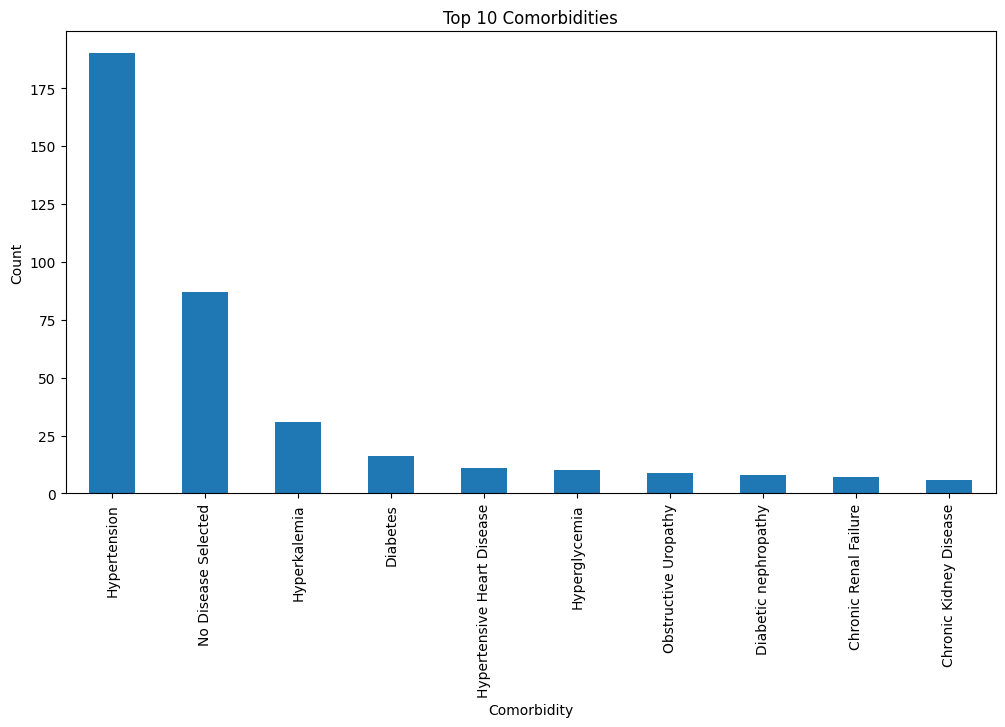

In [ ]:
plt.figure(figsize=(12, 6))
data_['Comorbidities'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Comorbidities')
plt.xlabel('Comorbidity')
plt.ylabel('Count')

Text(0.5, 0, 'Kidney Disease Stage')

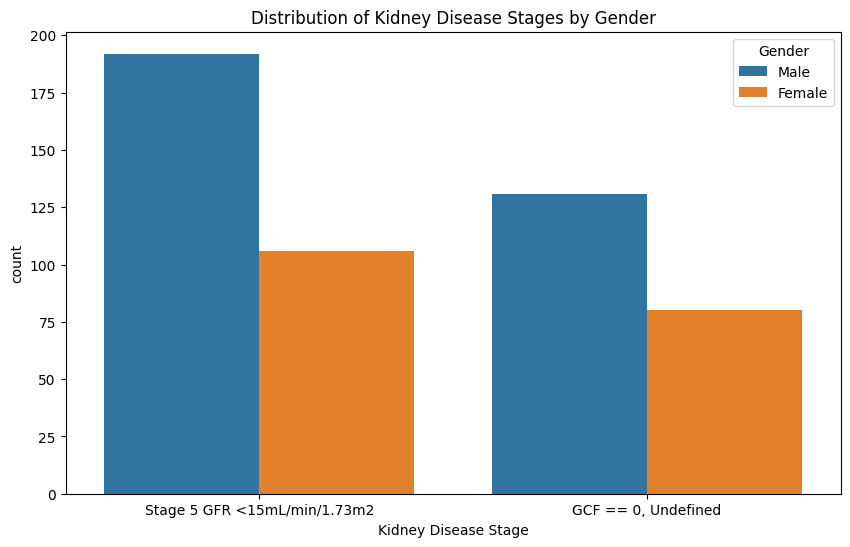

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual Diagnosed stage of the Acute and Chronic Kidney Disease', hue='Gender', data=data_)
plt.title('Distribution of Kidney Disease Stages by Gender')
plt.xlabel('Kidney Disease Stage')

<Figure size 1200x1000 with 0 Axes>

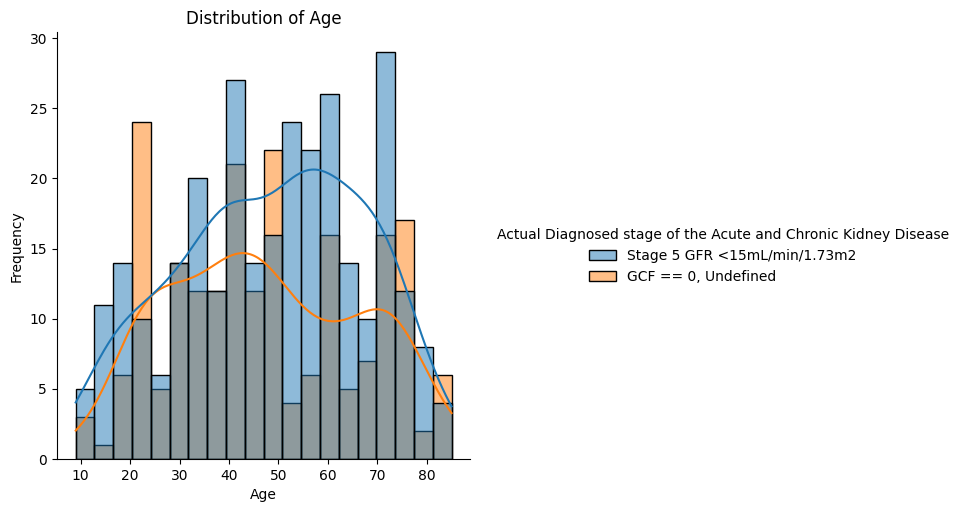

In [ ]:
plt.figure(figsize=(12,10))
sns.displot(data=data_, x='Age of Patient (year)', hue='Actual Diagnosed stage of the Acute and Chronic Kidney Disease',bins=20, kde=True) # Changed this line
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x1000 with 0 Axes>

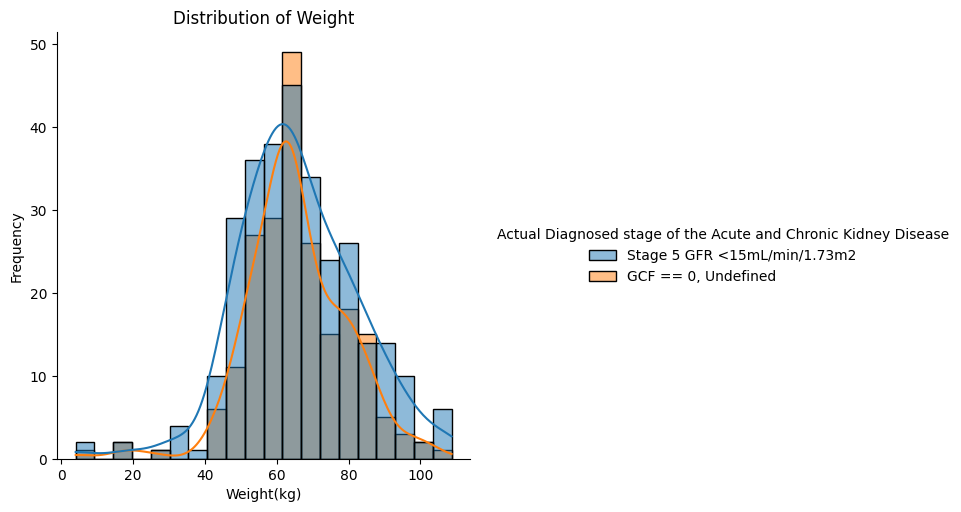

In [ ]:
plt.figure(figsize=(12,10))
sns.displot(data=data_, x='Weight (kg)', hue='Actual Diagnosed stage of the Acute and Chronic Kidney Disease',bins=20, kde=True) # Changed this line
plt.title('Distribution of Weight')
plt.xlabel('Weight(kg)')
plt.ylabel('Frequency')
plt.show()

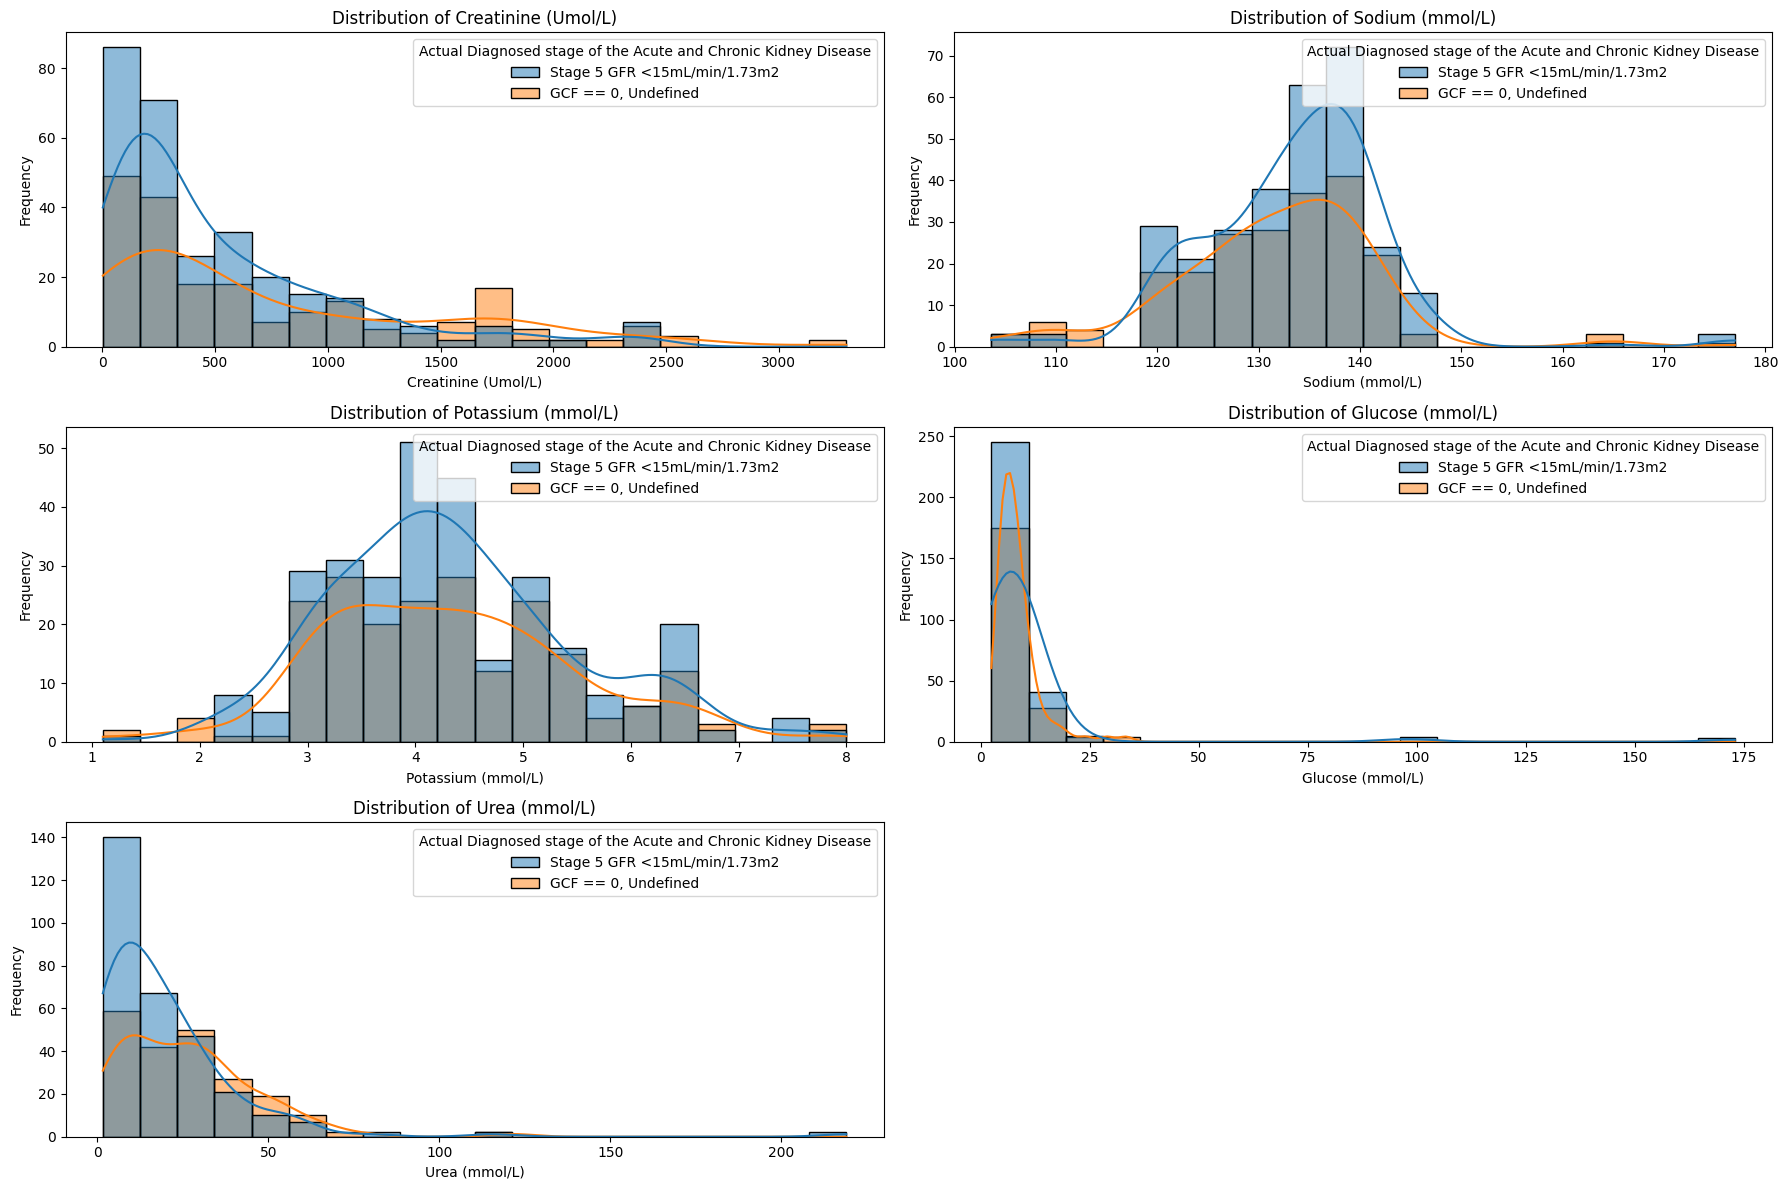

In [ ]:
fig, axes = plt.subplots(nrows=(len(minerals_columns) + 1) // 2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Loop over the mineral columns and generate a plot for each
for idx, col in enumerate(minerals_columns):
    sns.histplot(data=data_, x=col, hue='Actual Diagnosed stage of the Acute and Chronic Kidney Disease',
                 bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

for idx in range(len(minerals_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

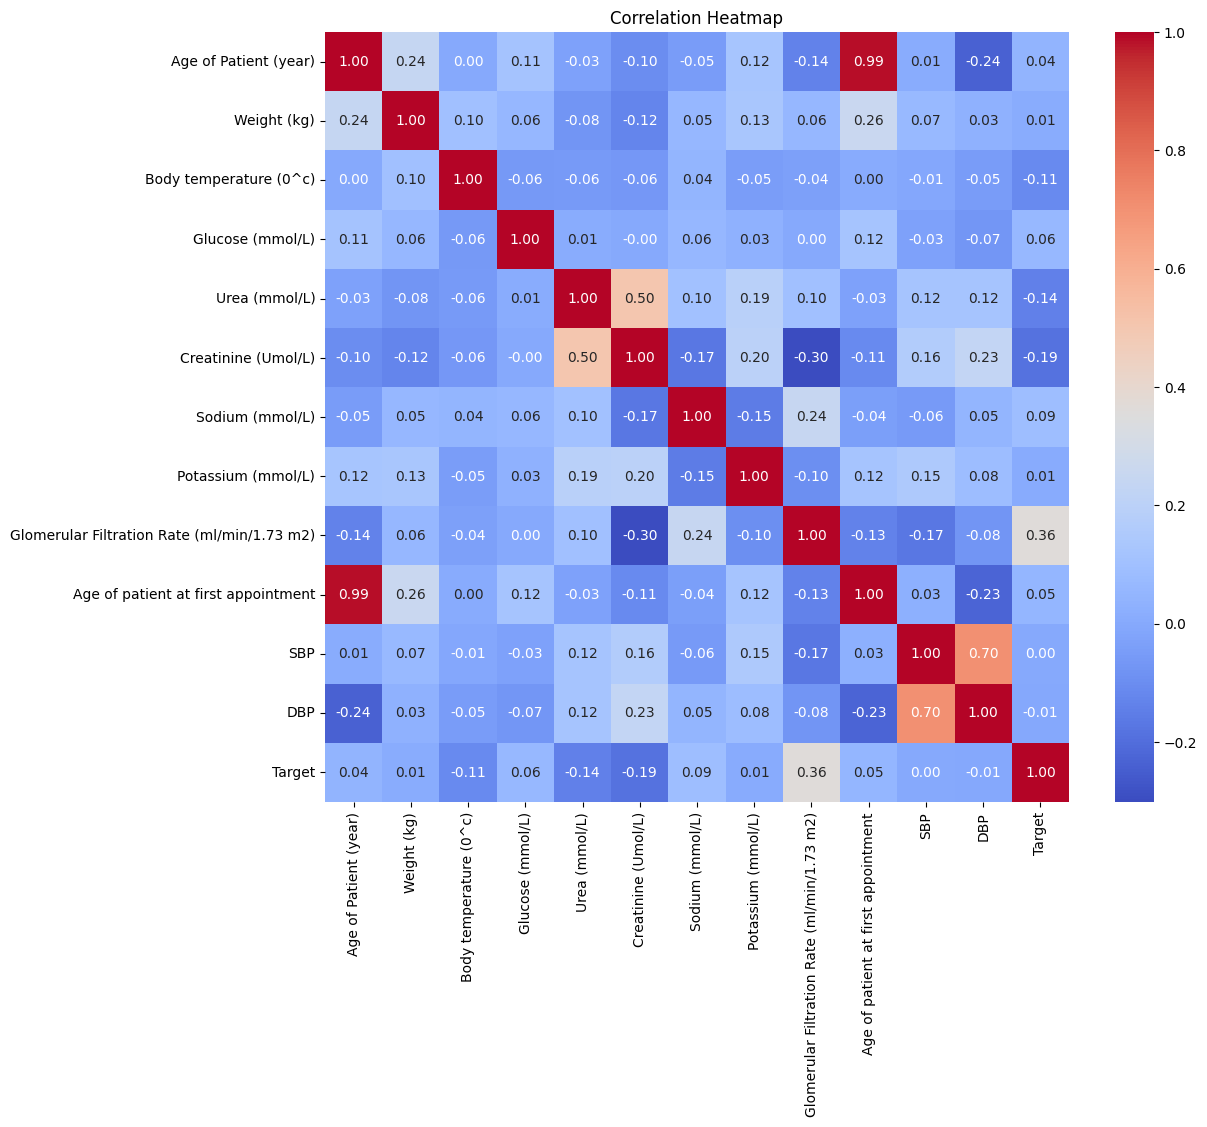

In [ ]:
numerical_columns = data_.select_dtypes(include=[np.number]).columns.tolist()

correlation_table = data_[numerical_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data_.columns

Index(['Created At', 'Hospital', 'Age of Patient (year)', 'Gender',
       'Blood Pressure (mm/Hg)', 'Weight (kg)', 'Body temperature (0^c)',
       'Glucose (mmol/L)', 'Urea (mmol/L)', 'Creatinine (Umol/L)',
       'Sodium (mmol/L)', 'Potassium (mmol/L)',
       'Glomerular Filtration Rate (ml/min/1.73 m2)',
       'Intermediate laboratory report(s)',
       'Actual Diagnosed stage of the Acute and Chronic Kidney Disease',
       'Treatment for this stage of the Acute and Chronic Kidney Disease',
       'Comorbidities', 'Date of first appointment',
       'Stage of ACKD at first appointment',
       'Level of education at first appointment',
       'Age of patient at first appointment',
       'Location of Patient at first appointment', 'Lifestyle of patient',
       'Circumstances surrounding first appointment', 'SBP', 'DBP', 'Target'],
      dtype='object')

In [ ]:
data_['Level of education at first appointment'] = data_['Level of education at first appointment'].str.title()
data_['Level of education at first appointment'].value_counts()

,count
Level of education at first appointment,
Trader,88
Trading,36
Civil Servant,35
Farmer,28
Student,26
...,...
Retired Security Officer,2
Retired Military Man,2
Retired Banker,2


### Standardization of Educational and Professional Roles

In this analysis, the dataset's "Level of education at first appointment" column was standardized by mapping various educational qualifications and professional roles to broader categories. This helps to simplify the understanding of the diverse roles within the dataset by grouping them into relevant categories.

The mapping included educational levels, vocational and professional roles, as well as job-related and retirement statuses. For example:

- **Tertiary Education** includes entries like "B.Sc," "M.Sc," and "Undergraduate."
- **Secondary Education** includes entries like "Secondary School Student" and "Ssce."
- **Vocational Worker** includes trades such as "Carpenter," "Tailor," and "Electrician."
- **Civil Servant** and **Retired Civil Servant** categorize those in or retired from public service roles.
- **Healthcare Professional** covers roles like "Medical Doctor" and "Consultant."


This categorization provides a more simplified and organized view of the participants' educational and professional backgrounds, helping to analyze the relationship between these factors and other variables in the dataset.

In [ ]:
education_mapping = {
    # Education Levels
    'Tertiary Level Of Education': 'Tertiary Education',
    'B.Sc': 'Tertiary Education',
    'Undergraduate': 'Tertiary Education',
    '200 Level': 'Tertiary Education',
    'Secondary School Student': 'Secondary Education',
    'Ssce': 'Secondary Education',
    'Primary School': 'Primary Education',
    'Primary School Teacher': 'Primary Education',
    'Graduate': 'Tertiary Education',
    'M.Sc': 'Tertiary Education',
    'Nd': 'Tertiary Education',
    'Lecturing': 'Academic',
    'Pharmacist': 'Healthcare Professional',


    # Teaching-related roles
    'Teacher': 'Teacher',
    'Secondary School Teacher': 'Teacher',
    'School Teacher': 'Teacher',
    'Teaching': 'Teacher',
    'Retired Teacher': 'Retired Teacher',
    'Retired Primary School Teacher': 'Retired Teacher',

    # Civil Service-related roles
    'Civil Servant': 'Civil Servant',
    'Civic Servant': 'Civil Servant',
    'Retired Civil Servant': 'Retired Civil Servant',

    # Retirement
    'Retiree': 'Retiree',
    '60 Year Old Retiree': 'Retiree',
    'Retired Worker From General Hospital': 'Retiree',
    'Retired Health Technician': 'Retiree',

    # Redundant or specific job labels
    'Truck Driver': 'Driver',
    'Conductor': 'Driver',

    # Vocational work & artisan
    'Artisian': 'Vocational Worker',
    'Tailor/Artisan': 'Vocational Worker',
    'Fashion Designer': 'Vocational Worker',
    'Automobile Mechanic': 'Vocational Worker',
    'Carpenter': 'Vocational Worker',
    'Computer Operator': 'Vocational Worker',

    # Farming-related
    'Farmer/Motorcyclist': 'Farmer',

    # Civil Service related
    'Public Servant': 'Civil Servant',
    'Staff Of Lth': 'Civil Servant',  # If LTH = govt hospital
    'Retired Military Officer': 'Retired Civil Servant',
    'Retired Banker': 'Retired Civil Servant',
    'Retired Military Man': 'Retired Civil Servant',
    'Retired Security Officer': 'Retired Civil Servant',
    '72 Year Old Civil Servant Retiree': 'Retired Civil Servant',

    # Other professions
    'Businessman': 'Trader',
    'Business Man (Motor Dealer)': 'Trader',
    'Contractor': 'Trader',
    'Self Employed': 'Trader',

    # Miscellaneous
    'Housewife': 'Unemployed',
    'Primary 5 Pupil': 'Primary Education',
    'Herbalist': 'Informal Health Worker',

        # Farmers
    'Farmer': 'Farmer',
    'Farming': 'Farmer',
    'Poultry Farmer': 'Farmer',
    'Cattle Rearer': 'Farmer',

    # Students
    'Student': 'Student',
    'Schooling': 'Student',

    # Technical / Vocational Jobs
    'Electrician': 'Vocational Worker',
    'Welder': 'Vocational Worker',
    'Tailor': 'Vocational Worker',
    'Bricklayer': 'Vocational Worker',
    'Artisan': 'Vocational Worker',
    'Trade/Bricklayer': 'Vocational Worker',
    'Building Contractor': 'Vocational Worker',

    # Healthcare
    'Medical Doctor': 'Healthcare Professional',
    'Consultant': 'Healthcare Professional',

    # Others
    'Lecturer': 'Academic',
    'Professor': 'Academic',
    'Driver': 'Driver',
    'Driving': 'Driver',
    'Applicant': 'Unemployed',
    'Dependant': 'Unemployed',
    'Patent Medicine Seller': 'Informal Health Worker',
    'Pastoring' : 'Clergy',
    'Trading' : 'Trader',
    'Clergyman' : 'Clergy',
    'Petty Trader' : 'Trader'


}


data_['Level of education at first appointment'] = data_['Level of education at first appointment'].replace(education_mapping)
data_['Level of education at first appointment'].value_counts()

,count
Level of education at first appointment,
Trader,136
Civil Servant,45
Farmer,44
Vocational Worker,42
Tertiary Education,39
Retiree,31
Student,28
Teacher,23
Retired Civil Servant,21


In [ ]:
education_counts = data_['Level of education at first appointment'].value_counts()

# Explode the top 3 categories
explode_values = [0.1, 0.1, 0.1] + [0] * (len(education_counts) - 3)

# Create an interactive pie chart using Plotly
fig = px.pie(
    values=education_counts.values,
    names=education_counts.index,
    title='Distribution of Level of Education',
    hole=0.3,  # Add a hole to make it a donut chart
    width=1000,  # Set the width of the chart
    height=800, # Set the height of the chart
)

fig.update_traces(
    textposition='inside',  # Display labels inside the slices
    textinfo='percent+label',
    pull=explode_values  # Explode slices
)

fig.show()

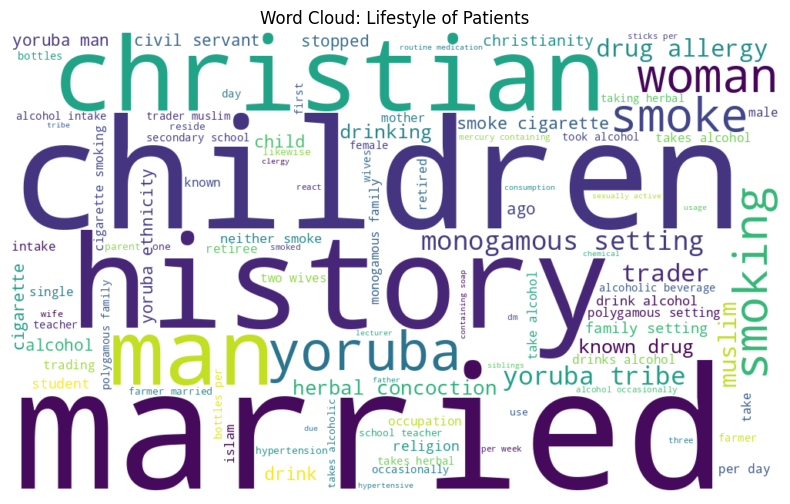

In [ ]:
# Combine all lifestyle descriptions into one string
text = ' '.join(data_['Lifestyle of patient'].dropna().astype(str)).lower()

# Define stopwords
stopwords = set(STOPWORDS)
# You can add more custom stopwords if needed
custom_stopwords = {'patient', 'lifestyle', 'also', 'none','year','years','old'}  # Add words you want to exclude
stopwords.update(custom_stopwords)

# Create the WordCloud object with stopwords
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='viridis',
    stopwords=stopwords,
    max_words=100
).generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Lifestyle of Patients')
plt.show()


In [ ]:
data_.isnull().sum()

,0
Created At,0
Hospital,0
Age of Patient (year),0
Gender,0
Blood Pressure (mm/Hg),0
Weight (kg),0
Body temperature (0^c),0
Glucose (mmol/L),0
Urea (mmol/L),0
Creatinine (Umol/L),0


In [ ]:
# convert the data and send to csv
data_.to_csv("CKD_Clean_Data.csv", index=False)